# OAI-PMH

La documentación del protocolo la podéis encontrar aquí:

https://www.openarchives.org/OAI/openarchivesprotocol.html

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
```

In [124]:
import xml.etree.ElementTree as ET
import requests
import json

### Identify

This verb is used to retrieve information about a repository. Some of the information returned is required as part of the OAI-PMH. Repositories may also employ the Identify verb to return additional descriptive information.

In [125]:
import xml.etree.ElementTree as ET
import requests

oai = requests.get('https://zenodo.org/oai2d?verb=Identify') #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)
print(oai.text)
#Iterator para recorrer todos los elementos (incluso anidados)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

#Findall para encontrar un elemento específico
namespaces = {'ns': 'http://www.openarchives.org/OAI/2.0/'} # add more as needed
elementos = xmlTree.findall('.//ns:baseURL',namespaces)
print(elementos) #Element
for e in elementos:
    print("BaseURL:", e.text)

<?xml version='1.0' encoding='UTF-8'?>
<?xml-stylesheet type="text/xsl" href="/static/xsl/oai2.xsl"?>
<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2019-12-02T11:08:52Z</responseDate>
  <request verb="Identify">https://zenodo.org/oai2d</request>
  <Identify>
    <repositoryName>Zenodo</repositoryName>
    <baseURL>https://zenodo.org/oai2d</baseURL>
    <protocolVersion>2.0</protocolVersion>
    <adminEmail>info@zenodo.org</adminEmail>
    <earliestDatestamp>2014-02-03T14:41:33Z</earliestDatestamp>
    <deletedRecord>no</deletedRecord>
    <granularity>YYYY-MM-DDThh:mm:ssZ</granularity>
  </Identify>
</OAI-PMH>

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-12-02T11:08:52Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d


### Listar tipos de metadatos

ListMetadataFormats

This verb is used to retrieve the metadata formats available from a repository. An optional argument restricts the request to the formats available for a specific item.


In [126]:
import xml.etree.ElementTree as ET
import requests

oai = requests.get('https://zenodo.org/oai2d?verb=ListMetadataFormats') #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-12-02T11:08:55Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListMetadataFormats: 
    
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: http://www.loc.gov/MARC21/slim
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite4
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: http://datacite.org/schema/kernel-4
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.

Podemos capturar sólo la información relevante

In [127]:
iterator = xmlTree.iter()
for elem in iterator:
    if (elem.tag == '{http://www.openarchives.org/OAI/2.0/}metadataPrefix') or (elem.tag == '{http://www.openarchives.org/OAI/2.0/}schema'):
        print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite4
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_dc
{http://www.openarchives.org/OAI/2.0/}schema: http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: dcat
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-3/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marc21
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.ope

O de forma más "elegante"

In [128]:
for e in xmlTree.findall('.//{http://www.openarchives.org/OAI/2.0/}metadataFormat'):
    metadataPrefix = e.find('{http://www.openarchives.org/OAI/2.0/}metadataPrefix').text
    schema = e.find('{http://www.openarchives.org/OAI/2.0/}schema').text
    print(metadataPrefix, ':', schema)

marcxml : http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
oai_datacite4 : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
oai_dc : http://www.openarchives.org/OAI/2.0/oai_dc.xsd
dcat : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
oai_datacite : http://schema.datacite.org/meta/kernel-3/metadata.xsd
marc21 : http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
datacite : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
datacite3 : http://schema.datacite.org/meta/kernel-3/metadata.xsd
datacite4 : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
oai_datacite3 : http://schema.datacite.org/meta/kernel-3/metadata.xsd


Podemos describir el último schema

In [129]:
oai_datacite = requests.get('http://schema.datacite.org/meta/kernel-3/metadata.xsd') #Peticion al servidor
print(oai_datacite.text)

#Para crear el arbol XML
xmlTree = ET.fromstring(oai_datacite.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Revision history
     2010-08-26   Complete revision according to new common specification by the metadata work group after review. AJH, DTIC
	 2010-11-17 Revised to current state of kernel review, FZ, TIB 
	 2011-01-17 Complete revsion after community review. FZ, TIB
	 2011-03-17 Release of v2.1: added a namespace; mandatory properties got minLength; changes in the definitions of relationTypes
	 IsDocumentedBy/Documents and isCompiledBy/Compiles; changes type of property "Date" from xs:date to xs:string. FZ, TIB
	 2011-06-27 v2.2: namespace: kernel-2.2, additions to controlled lists "resourceType", "contributorType", "relatedIdentifierType", and "descriptionType". Removal of intermediate include-files.
     2013-05 v3.0: namespace: kernel-3.0; delete LastMetadataUpdate & MetadateVersionNumber; additions to controlled lists "contributorType", "dateType", "descriptionType", "relationType", "relatedIdentifierType" & "resourceType"; deletion of 

Si analizamos la descripción del estándar, vemos que las etiquetas de los metadatos están almacenados en la etiqueta "element", en el atributo "name". Podemos obetener un listado de lo que esperamos encontrar

In [130]:
namespaces = {'xs' : 'http://www.w3.org/2001/XMLSchema'}
for tags in xmlTree.findall('.//xs:element',namespaces):
    print ('Metadato: ',tags.attrib['name'])

Metadato:  resource
Metadato:  identifier
Metadato:  creators
Metadato:  creator
Metadato:  creatorName
Metadato:  nameIdentifier
Metadato:  affiliation
Metadato:  titles
Metadato:  title
Metadato:  publisher
Metadato:  publicationYear
Metadato:  subjects
Metadato:  subject
Metadato:  contributors
Metadato:  contributor
Metadato:  contributorName
Metadato:  nameIdentifier
Metadato:  affiliation
Metadato:  dates
Metadato:  date
Metadato:  language
Metadato:  resourceType
Metadato:  alternateIdentifiers
Metadato:  alternateIdentifier
Metadato:  relatedIdentifiers
Metadato:  relatedIdentifier
Metadato:  sizes
Metadato:  size
Metadato:  formats
Metadato:  format
Metadato:  version
Metadato:  rightsList
Metadato:  rights
Metadato:  descriptions
Metadato:  description
Metadato:  br
Metadato:  geoLocations
Metadato:  geoLocation
Metadato:  geoLocationPoint
Metadato:  geoLocationBox
Metadato:  geoLocationPlace


### ListIdentifiers

This verb is an abbreviated form of ListRecords, retrieving only headers rather than records. Optional arguments permit selective harvesting of headers based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted.

Devuelve la cabecera de los registros, para conocer la información esencial.

Necesita el prefijo del formato de metadatos

In [131]:
#prefijo: oai_datacite
oai = requests.get('https://zenodo.org/oai2d?verb=ListIdentifiers&metadataPrefix=oai_datacite')
xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text) #Identifiers are really important because they are used to ask more information

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-12-02T11:09:19Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListIdentifiers: 
    
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3524411
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-31T16:52:56Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-wyred
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3524374
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-31T15:58:22Z
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3358139
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-31T15:41:19Z
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}id

{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3523716
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-31T05:35:01Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3523712
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-31T05:34:49Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3523710
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-31T05:34:44Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:3523708
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-10-31T05:34:39Z
{http://www.openarchives.o

### ListRecords

Listar los registros

This verb is used to harvest records from a repository. Optional arguments permit selective harvesting of records based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted. No metadata will be present for records with deleted status.

In [161]:
import xml.etree.ElementTree as ET
import requests

oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=oai_datacite')
xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2019-12-02T11:22:29Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3524411
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-31T16:52:56Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-wyred
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{ht

{http://datacite.org/schema/kernel-3}subject
higher managerial positions in civil service
{http://datacite.org/schema/kernel-3}subject
stability
{http://datacite.org/schema/kernel-3}subject
legal system
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2021-12-31
{http://datacite.org/schema/kernel-3}date
2019-12-20
{http://datacite.org/schema/kernel-3}language
pl
{http://datacite.org/schema/kernel-3}resourceType
Book section
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.3367229
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution Non Commercial Share Alike 3.0 Unported
{http://datacite.org/schema/kernel-3}rights
Embargoed Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
<p>Since 


                  
{http://datacite.org/schema/kernel-3}creatorName
Federczyk, Wojciech
{http://datacite.org/schema/kernel-3}nameIdentifier
0000-0003-1242-9552
{http://datacite.org/schema/kernel-3}affiliation
Wydział Prawa i Administracji Uniwersytetu Kardynała Stefana Wyszyńskiego
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Systemowe przesłanki weryfikacji decyzji w administracji publicznej
{http://datacite.org/schema/kernel-3}publisher
Zenodo
{http://datacite.org/schema/kernel-3}publicationYear
2019
{http://datacite.org/schema/kernel-3}subjects

                
{http://datacite.org/schema/kernel-3}subject
administrative procedure
{http://datacite.org/schema/kernel-3}subject
administrative law
{http://datacite.org/schema/kernel-3}subject
decisions making
{http://datacite.org/schema/kernel-3}subject
decisions verifcation
{http://datacite.org/schema/kernel-3}subject
audit
{http://datacite.org/schema/kernel-3}subject
internal

{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2021-12-31
{http://datacite.org/schema/kernel-3}date
2019-12-30
{http://datacite.org/schema/kernel-3}language
pl
{http://datacite.org/schema/kernel-3}resourceType
Book section
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.3371322
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution Non Commercial Share Alike 3.0 Unported
{http://datacite.org/schema/kernel-3}rights
Embargoed Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
<p>Basing the law on values, systematized and named by the legislator, may create a signifcant facilitation for public administration bodies to make judgments determining individual decisions.&nbsp;Correct unders

{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3520614
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-31T12:42:32Z
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
https://zenodo.org/record/3520614
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Fernandez-Luna, V
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.or

{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-24
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.11646/zootaxa.4688.4.8
{http://datacite.org/schema/kernel-3}relatedIdentifier
urn:lsid:plazi.org:pub:054403355E3E3E2FFFE93C7915279037
{http://datacite.org/schema/kernel-3}relatedIdentifier
http://publication.plazi.org/id/054403355E3E3E2FFFE93C7915279037
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/record/3517732
{http://datacite.org/schema/kernel-3}relatedIdentifier
http://treatment.plazi.org/id/F97D7B4D5E3D3E29FF7E3A0316CE96A9
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.3524166
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-3}rightsList

             

JING LI
{http://datacite.org/schema/kernel-3}nameIdentifier
0000-0002-5084-3554
{http://datacite.org/schema/kernel-3}affiliation
Imperial College London
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Consensus-Based Algorithm Proof
{http://datacite.org/schema/kernel-3}publisher
Zenodo
{http://datacite.org/schema/kernel-3}publicationYear
2019
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-30
{http://datacite.org/schema/kernel-3}language
en
{http://datacite.org/schema/kernel-3}resourceType
None
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.3523354
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution 4.0 International
{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacit

Universidade Federal do Maranhão, São Luís, Brazil|Universidade Federal do Maranhão, Chapadinha, Brazil
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Carvalho-Costa, Luis Fernando
{http://datacite.org/schema/kernel-3}affiliation
Universidade Federal do Maranhão, São Luís, Brazil
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Ottoni, Felipe Polivanov
{http://datacite.org/schema/kernel-3}affiliation
Universidade Federal do Maranhão, São Luís, Brazil|Universidade Federal do Maranhão, Chapadinha, Brazil
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Figure 4 from: de Brito PS, Guimarães EC, Carvalho-Costa LF, Ottoni FP (2019) A new species of Aphyocharax Günther, 1868 (Characiformes, Characidae) from the Maracaçumé river basin, eastern Amazon. Zoosystematics and Evolution 95(2): 507-516. https://doi.


                  
{http://datacite.org/schema/kernel-3}creatorName
Özcan, Taner
{http://datacite.org/schema/kernel-3}affiliation
Balıkesir University, Balıkesir, Turkey
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Figure 4 from: Özcan T (2019) Defining phylogenetic relationship of Nepeta x tmolea and its parents via DNA barcoding. PhytoKeys 134: 83-96. https://doi.org/10.3897/phytokeys.134.38238
{http://datacite.org/schema/kernel-3}publisher
Zenodo
{http://datacite.org/schema/kernel-3}publicationYear
2019
{http://datacite.org/schema/kernel-3}subjects

                
{http://datacite.org/schema/kernel-3}subject
hybrid
{http://datacite.org/schema/kernel-3}subject
molecular
{http://datacite.org/schema/kernel-3}subject
Nepeta
{http://datacite.org/schema/kernel-3}subject
phylogeny
{http://datacite.org/schema/kernel-3}subject
Turkey
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3

{http://datacite.org/schema/kernel-3}creatorName
Yoichi, Watanabe
{http://datacite.org/schema/kernel-3}affiliation
Chiba University, Matsudo, Japan
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Minamitani, Tadashi
{http://datacite.org/schema/kernel-3}affiliation
Unaffiliated, Miyazaki, Japan
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Oh, Sang-Hun
{http://datacite.org/schema/kernel-3}affiliation
Daejeon University, Deajeon, South Korea
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Nagano, Atsushi J.
{http://datacite.org/schema/kernel-3}affiliation
Ryukoku University, Otsu, Japan
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Abe, Harue
{http://datacite.org/schema/kernel-3}affiliation
Niigata University, Sado, Japan
{h

Open Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
Figure 5 Distribution of the Rhododendron tschonoskii alliance. Circles and squares showed locations of herbarium specimens (KYO, TNS).
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3523782
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-31T05:37:51Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource


                
{http://datacite.org/schema/kernel-3}subject
Plantae
{http://datacite.org/schema/kernel-3}subject
Tracheophyta
{http://datacite.org/schema/kernel-3}subject
Magnoliopsida
{http://datacite.org/schema/kernel-3}subject
Ericales
{http://datacite.org/schema/kernel-3}subject
Ericaceae
{http://datacite.org/schema/kernel-3}subject
Rhododendron
{http://datacite.org/schema/kernel-3}subject
Rhododendron tschonoskii
{http://datacite.org/schema/kernel-3}subject
Rhododendron tanakae
{http://datacite.org/schema/kernel-3}subject
Rhododendron tschonoskii trinerve
{http://datacite.org/schema/kernel-3}subject
Ericaceae
{http://datacite.org/schema/kernel-3}subject
new species
{http://datacite.org/schema/kernel-3}subject
phylogeny
{http://datacite.org/schema/kernel-3}subject
Rhododendron
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-31
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel

https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution 4.0 International
{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
Figure 8 Pattern of the lateral veins in Mesoamerican VirolaAVirola allenii (K. Thomsen 1284, NO) BV. amistadensis (G. McPherson 8703, MO) CV. chrysocarpa (B. Hammel et al.16864, MO) DV. elongata (M. Correa &amp; R. L. Dressler 1078, MO) EV. fosteri (G. de Nevers 7226, MO) FV. guatemalensis (G. Ibarra 957, MO) GV. koschnyi (J. Miller &amp; J. C. Sandino 1110, MO) HV. laevigata (N. Zamora &amp; T. D. Pennington 1583, MO) IV. megacarpa (G. de Nevers 5184, MO) JV. montana (E. Lépiz &amp; J. F. Morales 284, MO) KV. multiflora (J. Manzanares 3561, MO) LV. nobilis from Barro Colorado (R. J. Schmalzel 320, MO) MV. otobifolia (G.

{http://datacite.org/schema/kernel-3}subject
Virola multiflora
{http://datacite.org/schema/kernel-3}subject
Virola surinamensis
{http://datacite.org/schema/kernel-3}subject
Virola sebifera
{http://datacite.org/schema/kernel-3}subject
Costa Rica
{http://datacite.org/schema/kernel-3}subject
Flora Mesoamericana
{http://datacite.org/schema/kernel-3}subject
hallucinogenic
{http://datacite.org/schema/kernel-3}subject
Magnoliales
{http://datacite.org/schema/kernel-3}subject
nutmeg
{http://datacite.org/schema/kernel-3}subject
Panama
{http://datacite.org/schema/kernel-3}subject
taxonomy
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-31
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37979
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37979.figu

{http://datacite.org/schema/kernel-3}subject
Myristicaceae
{http://datacite.org/schema/kernel-3}subject
Virola
{http://datacite.org/schema/kernel-3}subject
Virola surinamensis
{http://datacite.org/schema/kernel-3}subject
Costa Rica
{http://datacite.org/schema/kernel-3}subject
Flora Mesoamericana
{http://datacite.org/schema/kernel-3}subject
hallucinogenic
{http://datacite.org/schema/kernel-3}subject
Magnoliales
{http://datacite.org/schema/kernel-3}subject
nutmeg
{http://datacite.org/schema/kernel-3}subject
Panama
{http://datacite.org/schema/kernel-3}subject
taxonomy
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-31
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37979
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37979.figure24
{http://

                
{http://datacite.org/schema/kernel-3}description
Figure 21 Virola montanaA branch with leaves and inflorescences B fruit C flowers. Drawn by Pedro Juarez based on G. Herrera et al. 514 (A–C), and R. Lent 3899 (B).
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3523740
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-31T05:36:01Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.

{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
Figure 18 Geographic distribution of Virola koschnyi (A), V. laevigata (B), V. megacarpa (C), V. montana (D), V. multiflora (E) and V. nobilis (F).
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3523732
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-31T05:35:41Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

  

{http://datacite.org/schema/kernel-3}subject
Virola
{http://datacite.org/schema/kernel-3}subject
Costa Rica
{http://datacite.org/schema/kernel-3}subject
Flora Mesoamericana
{http://datacite.org/schema/kernel-3}subject
hallucinogenic
{http://datacite.org/schema/kernel-3}subject
Magnoliales
{http://datacite.org/schema/kernel-3}subject
nutmeg
{http://datacite.org/schema/kernel-3}subject
Panama
{http://datacite.org/schema/kernel-3}subject
taxonomy
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-31
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37979
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37979.figure15
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-3

{http://datacite.org/schema/kernel-3}subject
Magnoliopsida
{http://datacite.org/schema/kernel-3}subject
Magnoliales
{http://datacite.org/schema/kernel-3}subject
Myristicaceae
{http://datacite.org/schema/kernel-3}subject
Virola
{http://datacite.org/schema/kernel-3}subject
Costa Rica
{http://datacite.org/schema/kernel-3}subject
Flora Mesoamericana
{http://datacite.org/schema/kernel-3}subject
hallucinogenic
{http://datacite.org/schema/kernel-3}subject
Magnoliales
{http://datacite.org/schema/kernel-3}subject
nutmeg
{http://datacite.org/schema/kernel-3}subject
Panama
{http://datacite.org/schema/kernel-3}subject
taxonomy
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-31
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37979
{http://datacite.org/schema/kernel-3}relatedIdent

{http://datacite.org/schema/kernel-3}description
Figure 10 Virola calophyllaA branch with leaves, showing both sides B branch with inflorescences. Virola elongataC leafy branch with inflorescences, inset fruit D inflorescences. Virola guatemalensisE, F leaf blades showing adaxial (E) and abaxial (F) surface. G young twigs and petioles. Photos by Robin Foster (A, B), from https://plantidtools.fieldmuseum.org/en/nlp; Steven Paton (C, D), Rolando Pérez (C inset), from https://stricollections.org/portal/index.php and Angela Rojas (E–G).
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:3523716
{http://www.openarchives.org/OAI/2.0/}datestamp
2019-10-31T05:35:01Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/


                
{http://datacite.org/schema/kernel-3}subject
Aristolochia
{http://datacite.org/schema/kernel-3}subject
Isotrema
{http://datacite.org/schema/kernel-3}subject
morphology
{http://datacite.org/schema/kernel-3}subject
subgenus Siphisia
{http://datacite.org/schema/kernel-3}subject
taxonomy
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-31
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37243
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/phytokeys.134.37243.figure1
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution 4.0 International
{http://datacite.org/sche

{http://datacite.org/schema/kernel-3}affiliation
University of Yangon, Yangon, Myanmar
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Yu, Long
{http://datacite.org/schema/kernel-3}affiliation
Hubei University, Wuhan, China
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Liu, Hao
{http://datacite.org/schema/kernel-3}affiliation
Hubei University, Wuhan, China
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Liu, Fengxiang
{http://datacite.org/schema/kernel-3}affiliation
Hubei University, Hubei, China
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Li, Daiqin
{http://datacite.org/schema/kernel-3}affiliation
National University of Singapore, Singapore, Singapore
{http://datacite.org/schema/kernel-3}titles

                
{http:/

user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
https://zenodo.org/record/3523682
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Robertson, D. Ross
{http://datacite.org/schema/kernel-3}affiliation
Smithsonian Tropical Research Institute, Balboa, Panama
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Pérez-España, Horacio
{http://datacite.org/sc

{http://datacite.org/schema/kernel-3}creatorName
Pérez-España, Horacio
{http://datacite.org/schema/kernel-3}affiliation
Uni­versidad Veracruzana, Veracruz, Mexico
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Domínguez-Domínguez, Omar
{http://datacite.org/schema/kernel-3}affiliation
Universidad Michoacana de San Nicolás de Hidalgo, Morelia, Mexico
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Estapé, Carlos J.
{http://datacite.org/schema/kernel-3}affiliation
Unaffiliated, Isla Morada, United States of America
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Estapé, Allison Morgan
{http://datacite.org/schema/kernel-3}affiliation
Unaffiliated, Isla Morada, United States of America
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Figure

{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Domínguez-Domínguez, Omar
{http://datacite.org/schema/kernel-3}affiliation
Universidad Michoacana de San Nicolás de Hidalgo, Morelia, Mexico
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Estapé, Carlos J.
{http://datacite.org/schema/kernel-3}affiliation
Unaffiliated, Isla Morada, United States of America
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Estapé, Allison Morgan
{http://datacite.org/schema/kernel-3}affiliation
Unaffiliated, Isla Morada, United States of America
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Figure 3 from: Robertson DR, Pérez-España H, Domínguez-Domínguez O, Estapé CJ, Estapé AM (2019) An update to the inventory of shore-fishes from the Parque Nacional Siste

{http://datacite.org/schema/kernel-3}subject
nomenclature
{http://datacite.org/schema/kernel-3}subject
observations
{http://datacite.org/schema/kernel-3}subject
photography vouchers
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2019-10-31
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/zookeys.882.38449
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.3897/zookeys.882.38449.figure13
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution 4.0 International
{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/sche

## Ejercicio 1

Muestra sólo el identificador y las palabras clave (subject)

In [191]:
records = xmlTree.findall('.//{http://www.openarchives.org/OAI/2.0/}record')

for r in records:
    print("Identifier: "+ r.findall('.//{http://datacite.org/schema/kernel-3}identifier')[0].text)
    
    if len(r.findall('.//{http://datacite.org/schema/kernel-3}subject')) > 0:
        print("Subject: " + r.findall('.//{http://datacite.org/schema/kernel-3}subject')[0].text)
        
    print("\n")

Identifier: 10.5281/zenodo.3524411
Subject: WYRED; H2020; Digital Society; Youth; Ethics


Identifier: 10.5281/zenodo.3524374


Identifier: 10.5281/zenodo.3358139
Subject: apoliticality


Identifier: 10.5281/zenodo.3524358


Identifier: 10.5281/zenodo.3367230
Subject: civil service


Identifier: 10.5281/zenodo.3367294
Subject: civil service


Identifier: 10.5281/zenodo.3524324
Subject: archaeology


Identifier: 10.5281/zenodo.3367438
Subject: devolution of decision-making processes


Identifier: 10.5281/zenodo.3369535
Subject: administrative procedure


Identifier: 10.5281/zenodo.3369547
Subject: civil service


Identifier: 10.5281/zenodo.3369563
Subject: legal values


Identifier: 10.5281/zenodo.3371323
Subject: axiology


Identifier: 10.5281/zenodo.3371851


Identifier: 10.5281/zenodo.3524287
Subject: archaeology


Identifier: 10.5281/zenodo.3524249


Identifier: 10.5281/zenodo.3524228
Subject: smart manufacturing


Identifier: https://zenodo.org/record/3520614


Identifier: 10.5281/

## Filtros

Registros entre dos fechas

In [10]:
import xml.etree.ElementTree as ET

bounds = "&from='2017-01-01'&until='2017-12-31'" #Para filtrar por fechas
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=oai_datacite'+bounds)
xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2019-11-28T15:34:30Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:1134089
{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-30T12:03:39Z
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zeno

{http://datacite.org/schema/kernel-3}creatorName
Andrew Hsiu
{http://datacite.org/schema/kernel-3}affiliation
Center for Research in Computational Linguistics
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Hezhang Buyi (Dazhai) audio word list
{http://datacite.org/schema/kernel-3}publisher
Zenodo
{http://datacite.org/schema/kernel-3}publicationYear
2017
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2017-12-21
{http://datacite.org/schema/kernel-3}resourceType
None
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1122578
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution 4.0 International
{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacite.org/schema/kernel-3}descriptions

 

{http://datacite.org/schema/kernel-3}date
2017-12-22
{http://datacite.org/schema/kernel-3}language
en
{http://datacite.org/schema/kernel-3}resourceType
None
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1127744
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/communities/digitalmedievalistjournal
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/communities/dpodrepository
{http://datacite.org/schema/kernel-3}version
1.0.1
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution 4.0
{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
<p>This is the Word template to use in formatting documents for typesetting and publication as preprints in Dig

{http://datacite.org/schema/kernel-3}date
2010-05-31
{http://datacite.org/schema/kernel-3}language
en
{http://datacite.org/schema/kernel-3}resourceType
None
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1127664
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Creative Commons Attribution 4.0 International
{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
<p>Deliverable D4.1 of the EUPHRESCO ERA-NET on evaluation of instruments, mechanisms and processed tested in the pilots</p>
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:1127663
{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-

Actinopterygii
{http://datacite.org/schema/kernel-3}subject
Perciformes
{http://datacite.org/schema/kernel-3}subject
Terapontidae
{http://datacite.org/schema/kernel-3}subject
Syncomistes
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2017-12-22
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
http://treatment.plazi.org/id/0E0E0456FFA0FF9627855DF3FC0DF9E8
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.11646/zootaxa.4367.1.1
{http://datacite.org/schema/kernel-3}relatedIdentifier
urn:lsid:plazi.org:pub:F2377C2EFFEEFFC527125B50FFE8FF9B
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/record/1125303
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1126991
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/communities/biosy

{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1126976
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Shelley, James J.
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Delaval, Aurélien
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Le, Matthew C.
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
FIGURE 24 in A revision of the grunter genus Syn

{http://datacite.org/schema/kernel-3}description
FIGURE 21.
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:1126962
{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-22T13:54:07Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1126962
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

       

{http://datacite.org/schema/kernel-3}title
FIGURE 17 in A revision of the grunter genus Syncomistes (Teleostei, Terapontidae, Syncomistes) with descriptions of seven new species from the Kimberley region, northwestern Australia
{http://datacite.org/schema/kernel-3}publisher
Zenodo
{http://datacite.org/schema/kernel-3}publicationYear
2017
{http://datacite.org/schema/kernel-3}subjects

                
{http://datacite.org/schema/kernel-3}subject
Biodiversity
{http://datacite.org/schema/kernel-3}subject
Taxonomy
{http://datacite.org/schema/kernel-3}subject
Animalia
{http://datacite.org/schema/kernel-3}subject
Chordata
{http://datacite.org/schema/kernel-3}subject
Actinopterygii
{http://datacite.org/schema/kernel-3}subject
Perciformes
{http://datacite.org/schema/kernel-3}subject
Terapontidae
{http://datacite.org/schema/kernel-3}subject
Syncomistes
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2017-12-22
{http://datacite.org/schema/ke

Actinopterygii
{http://datacite.org/schema/kernel-3}subject
Perciformes
{http://datacite.org/schema/kernel-3}subject
Terapontidae
{http://datacite.org/schema/kernel-3}subject
Syncomistes
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2017-12-22
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
http://treatment.plazi.org/id/0E0E0456FFCAFFEC27855EBEFB6BFF6C
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.11646/zootaxa.4367.1.1
{http://datacite.org/schema/kernel-3}relatedIdentifier
urn:lsid:plazi.org:pub:F2377C2EFFEEFFC527125B50FFE8FF9B
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/record/1125303
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1126937
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/sche

Chordata
{http://datacite.org/schema/kernel-3}subject
Actinopterygii
{http://datacite.org/schema/kernel-3}subject
Perciformes
{http://datacite.org/schema/kernel-3}subject
Terapontidae
{http://datacite.org/schema/kernel-3}subject
Syncomistes
{http://datacite.org/schema/kernel-3}dates

                
{http://datacite.org/schema/kernel-3}date
2017-12-22
{http://datacite.org/schema/kernel-3}resourceType
Figure
{http://datacite.org/schema/kernel-3}relatedIdentifiers

                
{http://datacite.org/schema/kernel-3}relatedIdentifier
http://treatment.plazi.org/id/0E0E0456FFF7FFDA27855A8EFBB5FDC4
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.11646/zootaxa.4367.1.1
{http://datacite.org/schema/kernel-3}relatedIdentifier
urn:lsid:plazi.org:pub:F2377C2EFFEEFFC527125B50FFE8FF9B
{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/record/1125303
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1126921
{http://datacite.org/schema/kernel-3}

{http://datacite.org/schema/kernel-3}description
<p>Deliverable D1.4 of the EUPHRESCO ERA-NET on the e-newsletters produced and disseminated</p>
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:1126674
{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-22T13:53:14Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1126674
{http://datacite.org/schema/kern

{http://datacite.org/schema/kernel-3}relatedIdentifier
https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
PLATE XI.[scale bars = 5 mm] 221. Carausius bicornis sp. nov., habitus of female. 222. Carausius bicornis sp. nov., female, abdomen, lateral view. 223. Carausius bicornis sp. nov., female, abdomen, dorsal view. 224. Carausius bicornis sp. nov., female, abdomen, ventral view. 225. Carausius bicornis sp. nov., female, head, prothorax and mesothorax, dorsolateral view. 226. Carausius huanglianshanensis sp. nov., habitus of female. 227. Carausius huanglianshanensis sp. nov., female, abdomen, lateral view. 228. Carausius huanglianshanensis sp. nov., female, abdomen, dorsal view. 229. Carausius huanglianshanensis sp. nov., female, abdomen, ventral view. 230. Cara

{http://datacite.org/schema/kernel-3}relatedIdentifier
http://zenodo.org/record/1126626
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1126628
{http://datacite.org/schema/kernel-3}relatedIdentifier
urn:lsid:plazi.org:fig:69-246-1313-193-1478
{http://datacite.org/schema/kernel-3}relatedIdentifier
http://zenodo.org/record/1126628
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1126630
{http://datacite.org/schema/kernel-3}relatedIdentifier
urn:lsid:plazi.org:fig:70-215-1373-193-1554
{http://datacite.org/schema/kernel-3}relatedIdentifier
http://zenodo.org/record/1126630
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.5281/zenodo.1126632
{http://datacite.org/schema/kernel-3}relatedIdentifier
urn:lsid:plazi.org:fig:71-153-1437-196-930
{http://datacite.org/schema/kernel-3}relatedIdentifier
http://zenodo.org/record/1126632
{http://datacite.org/schema/kernel-3}relatedIdentifier
10.11646/zootaxa.4368.1.1
{http://datacite.org/schema/kernel-3}

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1125261
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Shavrin, Alexey V.
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Smetana, Aleš
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
FIGURES 80–83 in A revision of Eastern Palaearctic Anthobium Leach, 1819 (Coleoptera: Staphylinidae: Omaliinae: Anthophagini). I. Gracilipalpe, morchella and nigrum groups
{http://datacite.org/schema/kernel-3}publisher
Zenodo
{http://datacite.org/schema/kernel-3}publicationYear
2017
{http://datacite.org/schema/kernel-3}subjects

                
{http://datacite.org/schema/kernel-3}subject
Biodiversity
{http://datacite.o


        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:1125251
{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-22T08:29:47Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1125251
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Shavrin, Alexey V.
{http://datacite.org/schema/kernel-3}creator

                  
{http://datac

https://zenodo.org/communities/biosyslit
{http://datacite.org/schema/kernel-3}rightsList

                
{http://datacite.org/schema/kernel-3}rights
Open Access
{http://datacite.org/schema/kernel-3}descriptions

                
{http://datacite.org/schema/kernel-3}description
FIGURE 63. Type locality of Anthobium morchella in the Baima Shan range, northern Yunnan, China (photograph: M. Schülke).
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:1125239
{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-22T08:29:21Z
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/

{http://datacite.org/schema/kernel-3}description
FIGURES 16–27. Abdominal segments of Anthobium (16, 19, 22, 25—A. gracilipalpe, 17, 20, 23, 26—A. morchella, 18, 21, 24, 27—A. nigrum): 16–18—male tergite VIII (dorsal view), 19–21—male sternite VIII (ventral view), 22–24—female tergite VIII (dorsal view), 25–27—female sternite VIII (ventral view).Scale bars: 0.1 mm.
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:1125223
{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-22T08:28:49Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http

user-dighl
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1123375
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Andrew Hsiu
{http://datacite.org/schema/kernel-3}affiliation
Center for Research in Computational Linguistics
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Wai Gelao (Dingjiapo) kinship terms
{http://datacite.org/schema/kernel-3}publisher


{http://datacite.org/schema/kernel-3}description
https://sites.google.com/site/msealangs/mondzish-branch/muangphe
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:1123436
{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-24T11:48:37Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-dighl
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1123436
{http://datacite.org/schema/kernel-3}creators

                
{ht

{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1123359
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Andrew Hsiu
{http://datacite.org/schema/kernel-3}affiliation
Center for Research in Computational Linguistics
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Nasu (Lanqing) audio word list
{http://datacite.org/schema/kernel-3}publisher
Zenodo
{http://d

{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Chli, Margarita
{http://datacite.org/schema/kernel-3}affiliation
ETHZ
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Loop-Closure Detection in Urban Scenes for Autonomous Robot Navigation
{http://datacite.org/schema/kernel-3}publisher
Zenodo
{http://datacite.org/schema/kernel-3}publicationYear
2017
{http://datacite.org/schema/kernel-3}contributors

                
{http://datacite.org/schema/kernel-3}contributor

                  
{http://datacite.org/schema/kernel-3}contributorName
European Commission
{http://datacite.org/schema/kernel-3}nameIdentifier
info:eu-repo/grantAgreement/EC/H2020/644128/
{http://datacite.org/schema/kernel-3}contributor

                  
{http://datacite.org/schema/kernel-3}contributorName
Schweizerischer Nationalfonds zur Förderung der Wissenschaftlichen Forschung
{http://datacite.org/s

{http://www.openarchives.org/OAI/2.0/}datestamp
2017-12-24T12:00:47Z
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite

          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality
true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion
3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol
CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload

            
{http://datacite.org/schema/kernel-3}resource

              
{http://datacite.org/schema/kernel-3}identifier
10.5281/zenodo.1123291
{http://datacite.org/schema/kernel-3}creators

                
{http://datacite.org/schema/kernel-3}creator

                  
{http://datacite.org/schema/kernel-3}creatorName
Andrew Hsiu
{http://datacite.org/schema/kernel-3}affiliation
Center for Research in Computational Linguistics
{http://datacite.org/schema/kernel-3}titles

                
{http://datacite.org/schema/kernel-3}title
Limi (Tuantian) audio wor

### GetRecord

This verb is used to retrieve an individual metadata record from a repository. Required arguments specify the identifier of the item from which the record is requested and the format of the metadata that should be included in the record. Depending on the level at which a repository tracks deletions, a header with a "deleted" value for the status attribute may be returned, in case the metadata format specified by the metadataPrefix is no longer available from the repository or from the specified item.

Obtener objeto digital de ese recurso

In [205]:
import xml.etree.ElementTree as ET
import urllib
#https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=oai_dc&identifier=oai:zenodo.org:252670
oai = requests.get('https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=oai_datacite&identifier=oai:zenodo.org:252977')
xmlTree = ET.fromstring(oai.text)
ns = {'oai' : 'http://www.openarchives.org/OAI/2.0/'}

#iterator = xmlTree.iter()
#for elem in iterator:
 #   print(elem.tag)
 #   print(elem.text)

for tags in xmlTree.findall('.//',ns):
    print (tags.tag+": ",tags.text)

{http://www.openarchives.org/OAI/2.0/}responseDate:  2019-12-02T12:15:28Z
{http://www.openarchives.org/OAI/2.0/}request:  https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}GetRecord:  
    
{http://www.openarchives.org/OAI/2.0/}record:  
      
{http://www.openarchives.org/OAI/2.0/}header:  
        
{http://www.openarchives.org/OAI/2.0/}identifier:  oai:zenodo.org:252977
{http://www.openarchives.org/OAI/2.0/}datestamp:  2019-04-10T04:00:17Z
{http://www.openarchives.org/OAI/2.0/}setSpec:  user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata:  
        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite:  
          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality:  true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion:  3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol:  CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload:  
            
{http://datacite.org/schema/kernel-3}resource:  
              
{http://datacite.org/s

In [12]:
import xml.etree.ElementTree as ET
#https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=oai_dc&identifier=oai:zenodo.org:252670
headers = {'Accept': 'application/rdf+xml;q=0.5'} #Type of response accpeted
r = requests.post('https://dx.doi.org/10.5281/zenodo.252363', headers=headers) #POST with headers
print(r.text)


<?xml version='1.0' encoding='utf-8' ?>
<rdf:RDF xmlns:rdf='http://www.w3.org/1999/02/22-rdf-syntax-ns#' xmlns:schema='http://schema.org/'>
<schema:ImageObject rdf:about='https://doi.org/10.5281/zenodo.252363'>
<schema:author>
<schema:Person rdf:nodeID='b4'>
<schema:familyName>Sääksjärvi</schema:familyName>

<schema:givenName>Ilari E.</schema:givenName>

<schema:name>Ilari E. Sääksjärvi</schema:name>

</schema:Person>

</schema:author>
 <schema:author>
<schema:Person rdf:nodeID='b2'>
<schema:familyName>Veijalainen</schema:familyName>

<schema:givenName>Anu</schema:givenName>

<schema:name>Anu Veijalainen</schema:name>

</schema:Person>

</schema:author>
 <schema:author>
<schema:Person rdf:nodeID='b3'>
<schema:familyName>Broad</schema:familyName>

<schema:givenName>Gavin R.</schema:givenName>

<schema:name>Gavin R. Broad</schema:name>

</schema:Person>

</schema:author>

<schema:datePublished rdf:datatype='http://schema.org/Date'>2014-12-31</schema:datePublished>

<schema:description>FI

## APIs específicas

El protocolo OAI-PMH ofrece una serie de funcionalidades genéricas e interoperables entre distintos repositorios. Sin embargo, existen ciertas limitaciones que no nos permiten automatizar todo lo necesario para analizar un gran número de dataset. Para ello, tenemos que recurrir a APIs específicas de los repositorios con los que trabajamos.

Zenodo proporciona una API bastante completa que complementa al protocolo OAI-PMH. En el siguiente enlace podemos ver su especificación y algunos ejemplos con curl y python.

http://developers.zenodo.org/

Entre otras cosas, podemos automatizar el proceso de publicación, descargar archivos, etc.

También, obteniendo el DOI de un recurso, podemos resolverlo para obtener cierta información específica, como la URL del objeto digital entre otras.

In [15]:
import json
#Buscamos datasets específicos-
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=datacite3')
oaiTree = ET.fromstring(oai.text)
#for i in oaiTree.iter():
#    print(i.tag)
records = oaiTree.findall('.//{http://www.openarchives.org/OAI/2.0/}record')
for e in records:
    for subject in e.findall('.//{http://datacite.org/schema/kernel-3}subject'):
        if "Animalia" in subject.text:
            print("Title: "+e.findall('.//{http://datacite.org/schema/kernel-3}title')[0].text)
            identifier = e.findall('.//{http://datacite.org/schema/kernel-3}identifier')[0].text
            print(identifier)
            print('\n')
            
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/958140',headers)
record = json.loads(r.text)
print(record['files'])

    

Title: FIGS. 29–33 in Immature stages of Neptis reducta Fruhstorfer, 1908 (Lepidoptera, Nymphalidae Neptini): morphology, ecology and food specialty
10.5281/zenodo.3524169


Title: FIGS. 24–28 in Immature stages of Neptis reducta Fruhstorfer, 1908 (Lepidoptera, Nymphalidae Neptini): morphology, ecology and food specialty
10.5281/zenodo.3524167


Title: FIGS. 19–23 in Immature stages of Neptis reducta Fruhstorfer, 1908 (Lepidoptera, Nymphalidae Neptini): morphology, ecology and food specialty
10.5281/zenodo.3524163


Title: FIGS. 13–18 in Immature stages of Neptis reducta Fruhstorfer, 1908 (Lepidoptera, Nymphalidae Neptini): morphology, ecology and food specialty
10.5281/zenodo.3524161


Title: FIGS. 7–12 in Immature stages of Neptis reducta Fruhstorfer, 1908 (Lepidoptera, Nymphalidae Neptini): morphology, ecology and food specialty
10.5281/zenodo.3524159


Title: Figure 4 from: de Brito PS, Guimarães EC, Carvalho-Costa LF, Ottoni FP (2019) A new species of Aphyocharax Günther, 1868 (Ch

[{'bucket': 'b645a5fb-e996-42a3-aaf5-a3f7ce75e853', 'checksum': 'md5:89a9f58721a73523c1ae855025b81ad4', 'key': 'oo_32747.jpg', 'links': {'self': 'https://zenodo.org/api/files/b645a5fb-e996-42a3-aaf5-a3f7ce75e853/oo_32747.jpg'}, 'size': 1085074, 'type': 'jpg'}]


# Ejercicio

* 1: Busca al menos dos repositorios digitales compatibles con OAI-PMH

In [192]:
# REPOSITORIO DE LA UNIVERSIDAD COMPLUTENSE DE MADRID
oai_1 = "http://eprints.ucm.es/cgi/oai2"

# REPOSITORIO DE LA UNIVERSIDAD DE NETHERLANDS
oai_2 = "https://web.archive.org/web/20150320213536/http://ir.ub.rug.nl/oai/"

* 2: Utiliza los verbos del protocolo para encontrar los recursos de un tema en concreto (puedes buscar en la descripción o en las palabras clave.

In [194]:
oai1 = requests.get(oai_1 + '?verb=ListRecords&metadataPrefix=oai_dc')

xmlTree = ET.fromstring(oai1.text)

records1 = xmlTree.findall('.//{http://www.openarchives.org/OAI/2.0/}record')

In [195]:
oai2 = requests.get(oai_2 + '?verb=ListRecords&metadataPrefix=oai_dc')

xmlTree = ET.fromstring(oai2.text)

records2 = xmlTree.findall('.//{http://www.openarchives.org/OAI/2.0/}record')

* 3: Obtén un listado de los títulos, identificadores (DOI o cualquier otro) y la dirección del recurso.

In [196]:
for e in records1:
    for subject in e.findall('.//{http://purl.org/dc/elements/1.1/}subject'):
        if "Música vocal" in subject.text:
            print("Title: "+ e.findall('.//{http://purl.org/dc/elements/1.1/}title')[0].text)
            print("Identifier: " + e.findall('.//{http://purl.org/dc/elements/1.1/}identifier')[0].text)
            print("Source: " + e.findall('.//{http://purl.org/dc/elements/1.1/}relation')[0].text)
            print("\n")

Title: La construcción del concepto de post-rock en España (1995-2001): el caso de Manta Ray
Identifier: https://eprints.ucm.es/45355/1/Fellone%2C%20Ugo%20-%20Trabajo%20Fin%20de%20Master%20ePrints.pdf
Source: https://eprints.ucm.es/45355/




In [197]:
for e in records2:
    for t in e.findall('.//{http://purl.org/dc/elements/1.1/}type'):
        if "Lecture" in t.text:
            print("Title: "+ e.findall('.//{http://purl.org/dc/elements/1.1/}title')[0].text)
            print("Identifier: " + e.findall('.//{http://purl.org/dc/elements/1.1/}identifier')[0].text)
            print("Source: " + e.findall('.//{http://purl.org/dc/elements/1.1/}relation')[0].text)
            print("\n")

Title: Just take her seriously
Identifier: http://irs.ub.rug.nl/ppn/271588403
Source: http://www.rug.nl/


Title: Overtuigingen maken het verschil
Identifier: http://irs.ub.rug.nl/ppn/274605813
Source: http://www.rug.nl/


Title: Targets halen in het onderzoek naar problemen bij het opvoeden van kinderen die in hun ontwikkeling worden belemmerd
Identifier: http://irs.ub.rug.nl/ppn/274608146
Source: http://www.rug.nl/


Title: Gnostische theologie: kennis van de onkenbare God
Identifier: http://irs.ub.rug.nl/ppn/276353579
Source: http://www.rug.nl/


Title: Verbroken contacten
Identifier: http://irs.ub.rug.nl/ppn/243598742
Source: http://www.rug.nl/


Title: Prestatie, preventie of curatie
Identifier: http://irs.ub.rug.nl/ppn/278754937
Source: http://www.rug.nl/


Title: Ongelijke genen m/v : evolutionaire genetica van voortplantingswijzen
Identifier: http://irs.ub.rug.nl/ppn/239673743
Source: http://www.rug.nl/


Title: Van de nota een deugd maken : verrekening van telecommunicatie- en

* 4: ¿Qué problemas has encontrado? ¿Has tenido que manejar más de un formato de metadatos? ¿Qué limitaciones tiene el protocolo OAI-PMH? ¿Cómo lo mejorarías?

En ambos ejemplos se manejó el estándar de Dublin Core, sin embargo, ciertos datos no se encuentran completos o en el metadato adecuado. Tal es el caso del segundo ejemplo, cuyo identificador es la dirección del recurso (que funciona hasta cierto punto como identificador) pero en cuya lista de metadatos no se encuentra la dirección de este.

En el primer ejemplo, el único registro que concuerda con la búsqueda devuelve un fichero como identificador, el cual no es persistente ya que puede variar en el tiempo.

* 5: A través de los distintos métodos vistos (Uso de PID/DOI, OAI-PMH o APIs concretas de repositorios) intenta llegar al fichero de un dataset para mostrarlo (gráfica, imagen...)

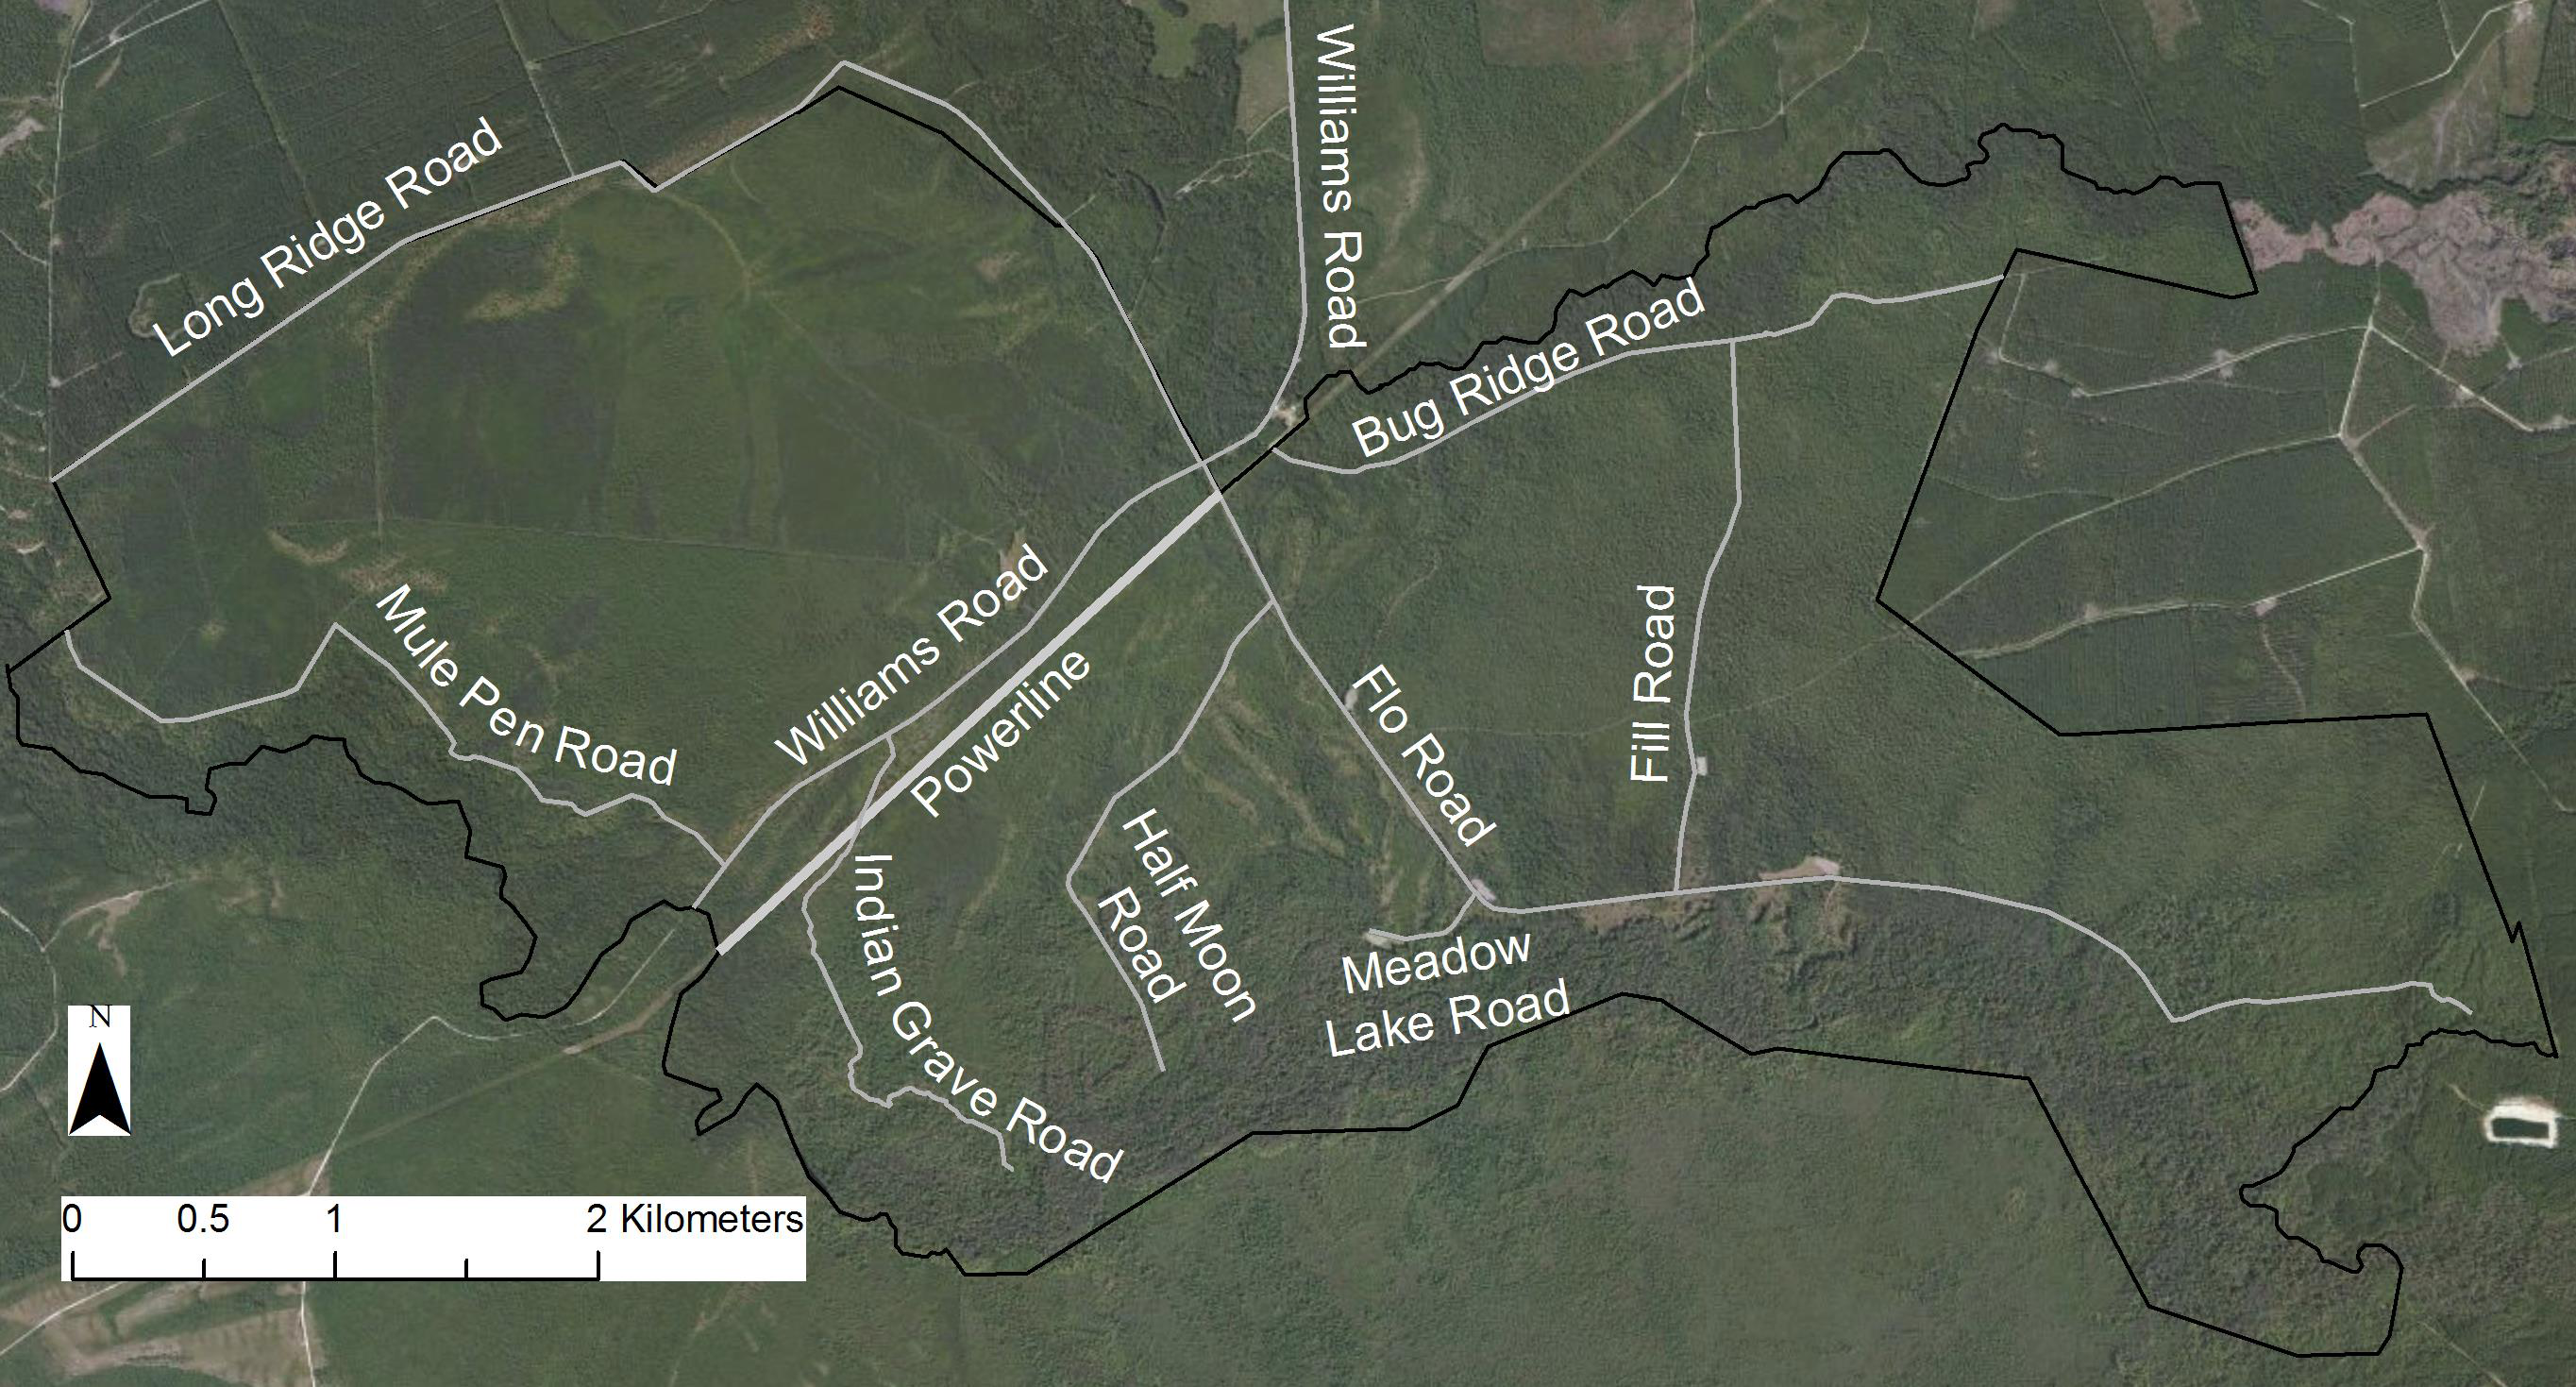

In [212]:
r = requests.get('https://zenodo.org/api/records/906980',headers)
record = json.loads(r.text)
fichero = record['files'][0]['links']['self']

f = open('Image.jpg','wb')
f.write(requests.get(fichero).content)
f.close()

from PIL import Image

img = Image.open('Image.jpg')
img